In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn import metrics
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")

In [125]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   top  left  result  shot_type  distance_ft  score_difference
0  310   203   False          3           26                 0
1  213   259   False          2           16                -1
2  143   171   False          2           11                -3
3   68   215    True          2            3                -7
4   66   470   False          3           23                -1


In [126]:
# Split data
X = df.drop(columns=["result"])
y = df.result.astype("int")

print(X.head())
print("\n", y.head())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

   top  left  shot_type  distance_ft  score_difference
0  310   203          3           26                 0
1  213   259          2           16                -1
2  143   171          2           11                -3
3   68   215          2            3                -7
4   66   470          3           23                -1

 0    0
1    0
2    0
3    1
4    0
Name: result, dtype: int64


In [127]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=100, max_depth=4)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)



Confusion matrix: [[147  29]
 [ 84 124]]


Text(0.5, 427.9555555555555, 'Predicted label')

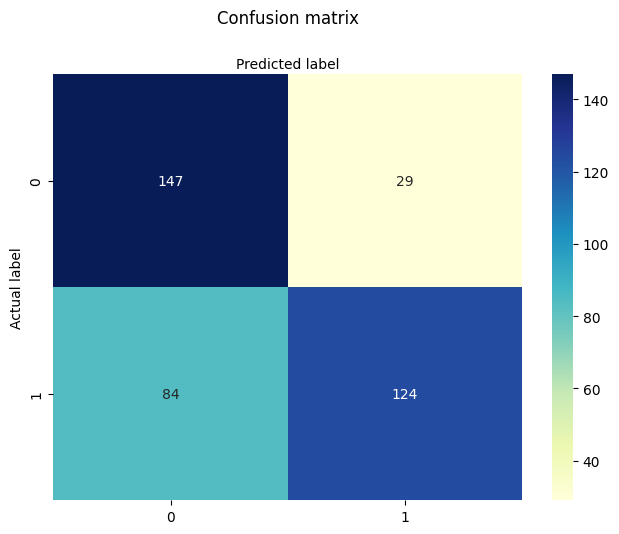

In [128]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: {cnf_matrix}")

class_names = y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [129]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7057291666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72       176
           1       0.81      0.60      0.69       208

    accuracy                           0.71       384
   macro avg       0.72      0.72      0.70       384
weighted avg       0.73      0.71      0.70       384


Confusion Matrix:
 [[147  29]
 [ 84 124]]


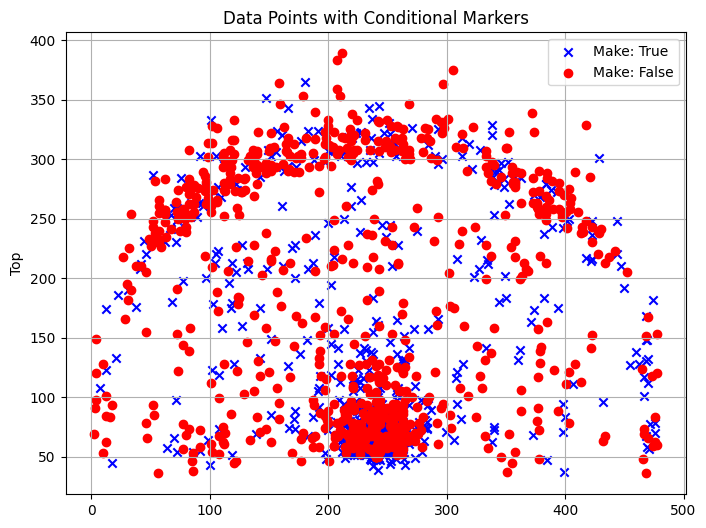

In [130]:
true_points = df[df["result"]] 
false_points = df[~df["result"]]

plt.figure(figsize=(8, 6)) 
plt.scatter(true_points["left"], true_points["top"], marker='x', color='blue', label='Make: True') 
plt.scatter(false_points["left"], false_points["top"], marker='o', color='red', label='Make: False') # Label axesplt.xlabel("Left") 
plt.ylabel("Top") # Add legend 
plt.legend() # Display the graph 
plt.title("Data Points with Conditional Markers") 
plt.grid(True) 
plt.show() 